In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv("train.csv")

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preproccsiong

In [42]:
df.shape

(891, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing VAlues

In [45]:
df = df.drop('Cabin', axis=1)

In [46]:
df['Age'] = df['Age'].fillna(df['Age'].mean)

In [47]:
df['Embarked'] = df['Embarked'].dropna

In [48]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### EDA

In [49]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [51]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [52]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

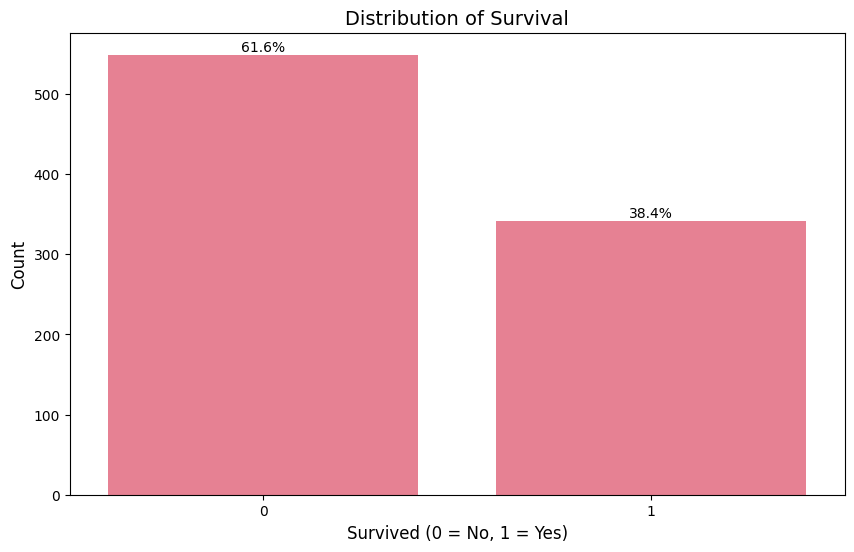

In [53]:
sns.set_palette("husl")

# Create a figure for survival distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survival', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels on top of each bar
total = len(df['Survived'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### Survival Rate by Gender
Let's analyze how survival rates differed between male and female passengers.

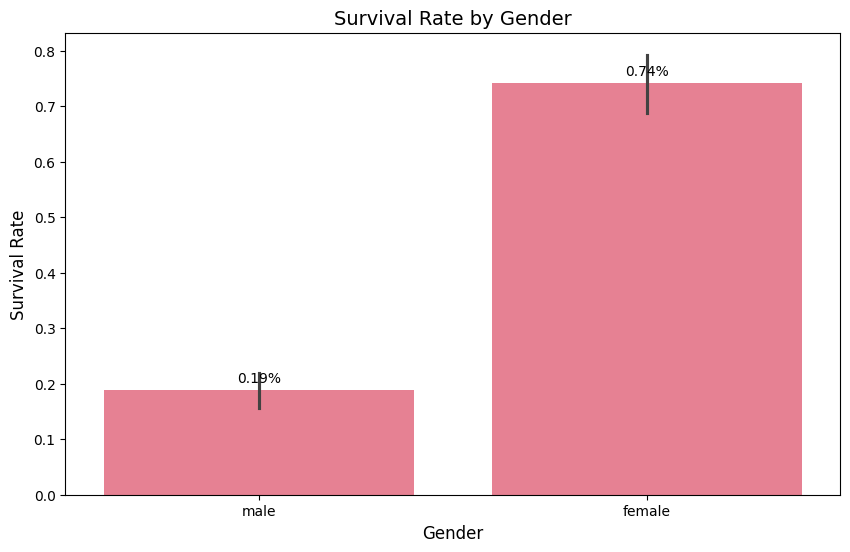

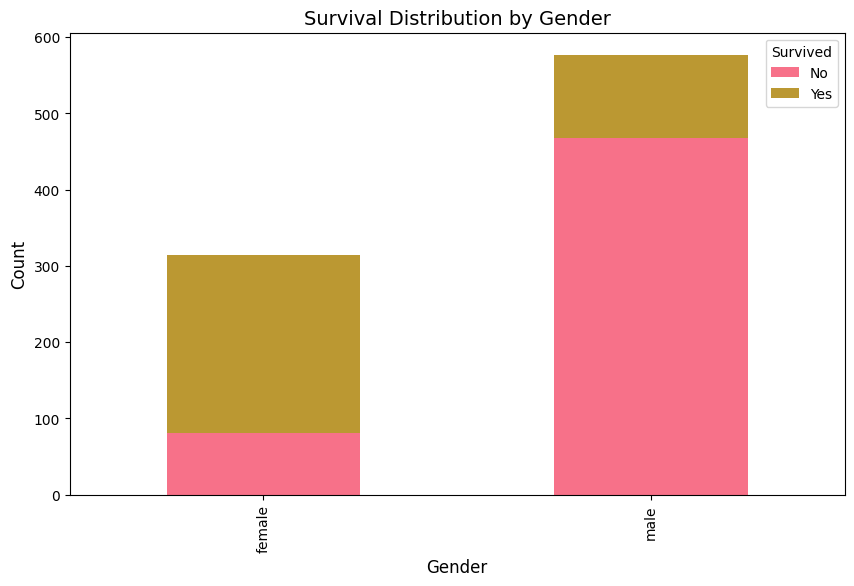

In [54]:
# Create plot for survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Create a more detailed view using crosstab
survival_by_gender = pd.crosstab(df['Sex'], df['Survived'])
survival_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Survival Rate by Passenger Class
Let's examine how passenger class (Pclass) affected survival rates.

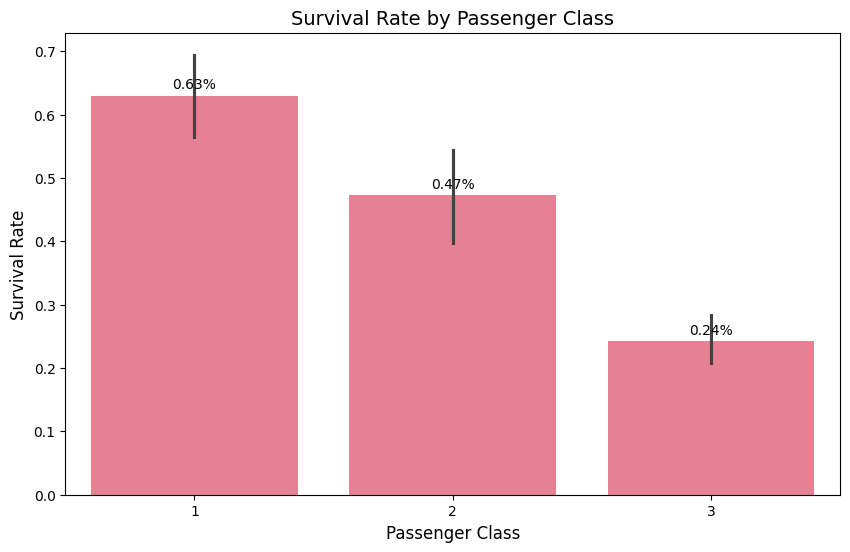

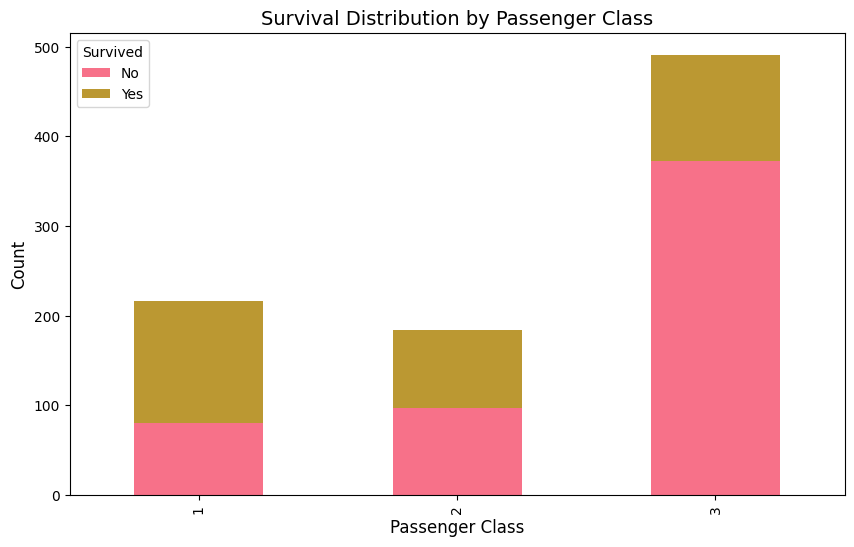

In [55]:
# Create plot for survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Create a more detailed view
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_by_class.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Distribution by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Age Distribution and Survival
Let's analyze how age affected survival rates.

### Correlation Matrix
Let's create a correlation matrix to understand the relationships between numerical variables.

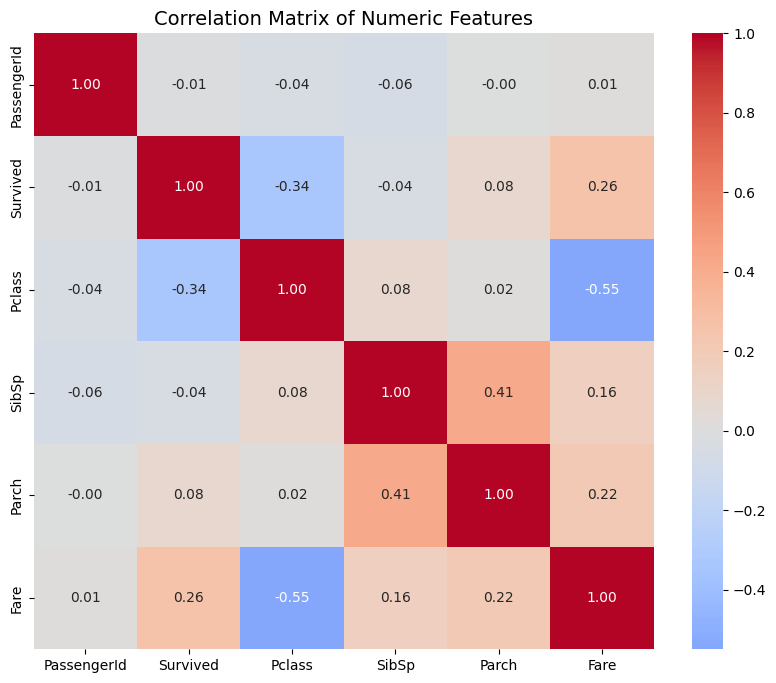


Correlation with Survival:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Pclass        -0.338481
Name: Survived, dtype: float64


In [58]:
# Calculate correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.show()

# Print correlation with 'Survived' variable
print("\nCorrelation with Survival:")
print(correlation_matrix['Survived'].sort_values(ascending=False))

### Model

In [ ]:
# Create dummy variables for 'Name', 'Sex', 'Age', and 'Ticket' columns in X
df['Name','Sex','Age','Ticket'] = pd.get_dummies(X, columns=['Name', 'Sex', 'Age', 'Ticket'])


ValueError: Cannot set a DataFrame with multiple columns to the single column ('Name', 'Sex', 'Age', 'Ticket')

In [61]:
X = df.drop("Survived", axis=1)
y = df['Survived']